In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import export_graphviz

sns.set_style('white')
pd.set_option('display.max_columns',None)

import pickle

In [3]:
df=pd.read_csv('C:\\Users\\kanis\\Desktop\\Dataset\\adult census.csv')

In [4]:
for i in df.select_dtypes(include='object').columns:
    encoder=LabelEncoder()
    df[i]=encoder.fit_transform(df[i])
    
    pickle.dump(encoder,open('encoder.pkl','wb'))

# EDA

## No of Unique Values in categorical columns

C:\Users\kanis\AppData\Local\Temp\ipykernel_9268\1080157022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[i],data=df,palette='magma')


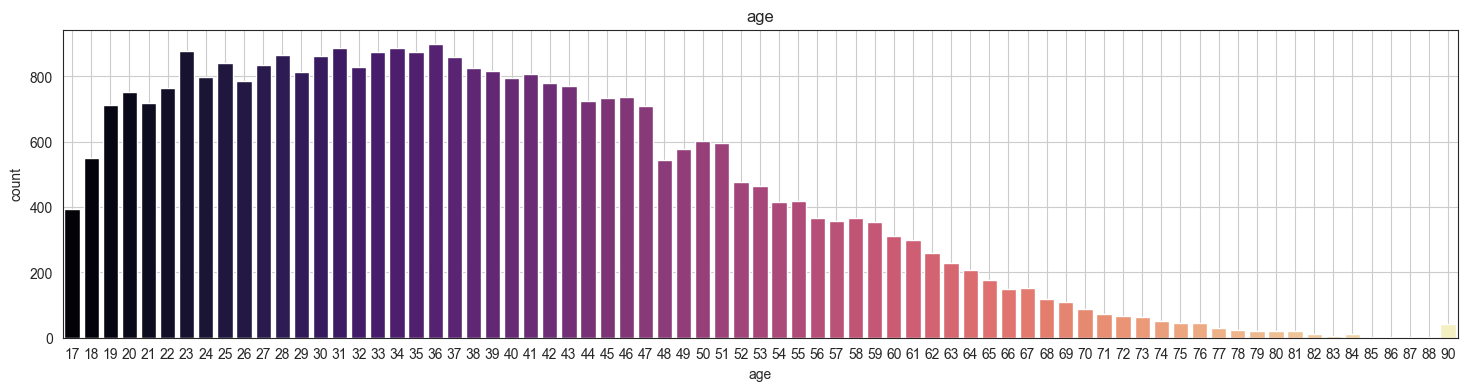

C:\Users\kanis\AppData\Local\Temp\ipykernel_9268\1080157022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[i],data=df,palette='magma')


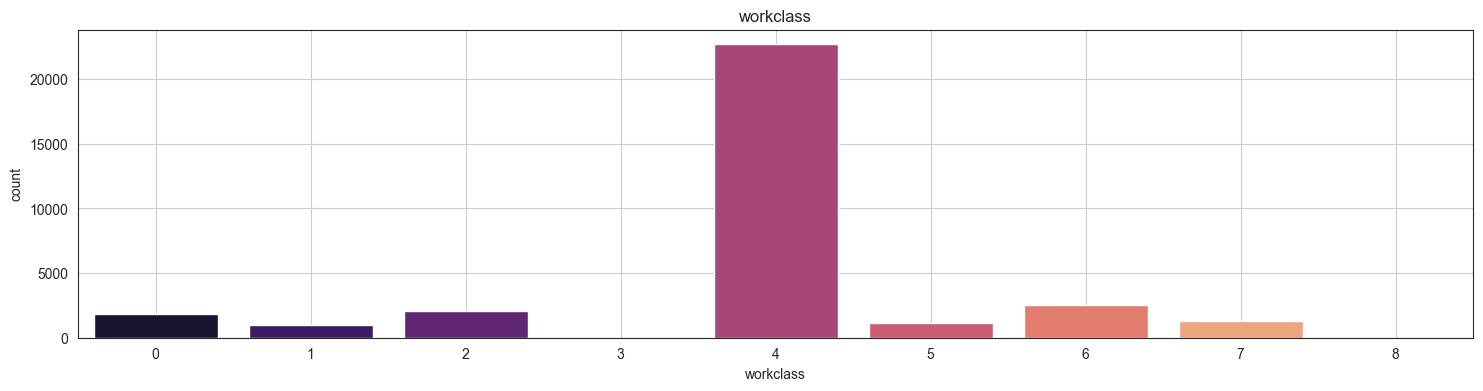

C:\Users\kanis\AppData\Local\Temp\ipykernel_9268\1080157022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[i],data=df,palette='magma')


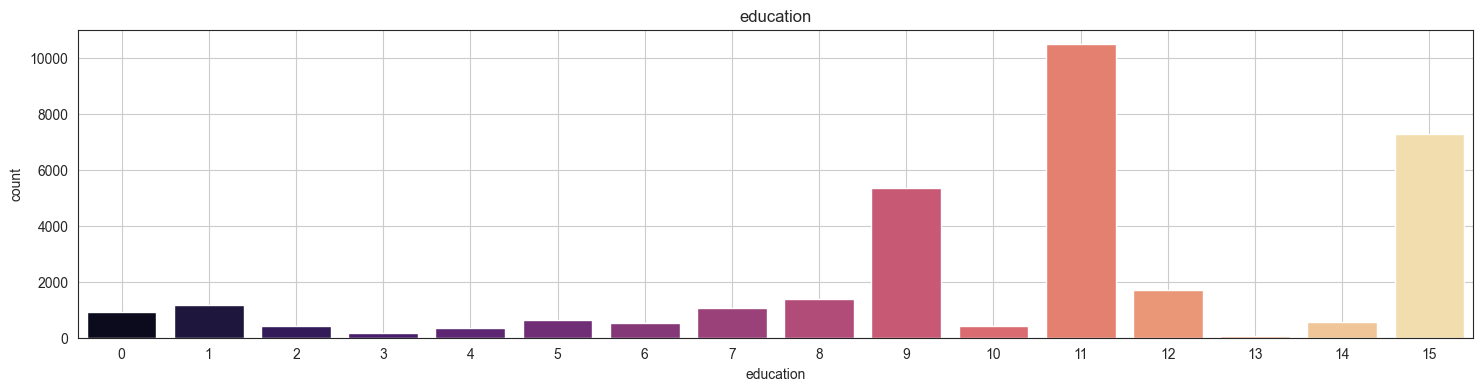

C:\Users\kanis\AppData\Local\Temp\ipykernel_9268\1080157022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[i],data=df,palette='magma')


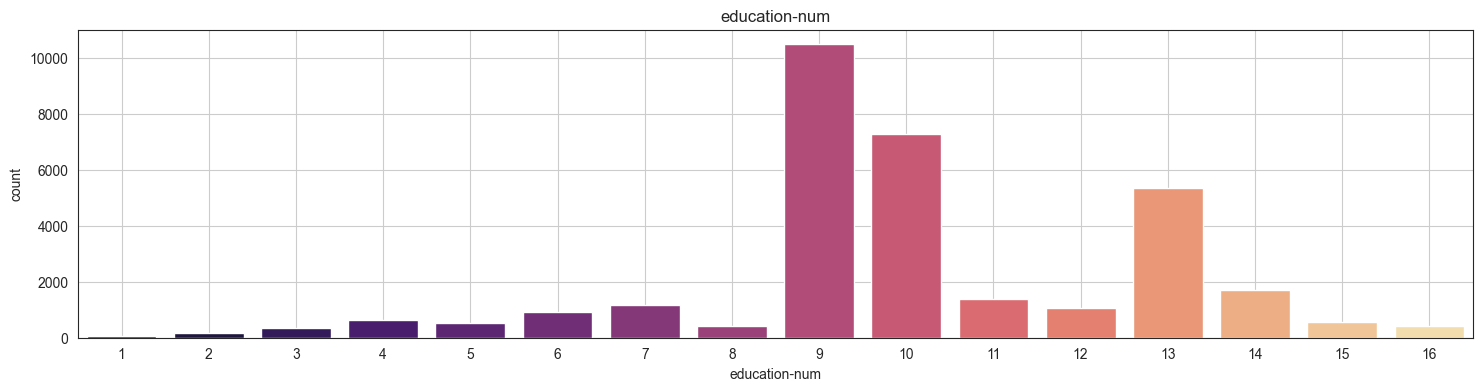

C:\Users\kanis\AppData\Local\Temp\ipykernel_9268\1080157022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[i],data=df,palette='magma')


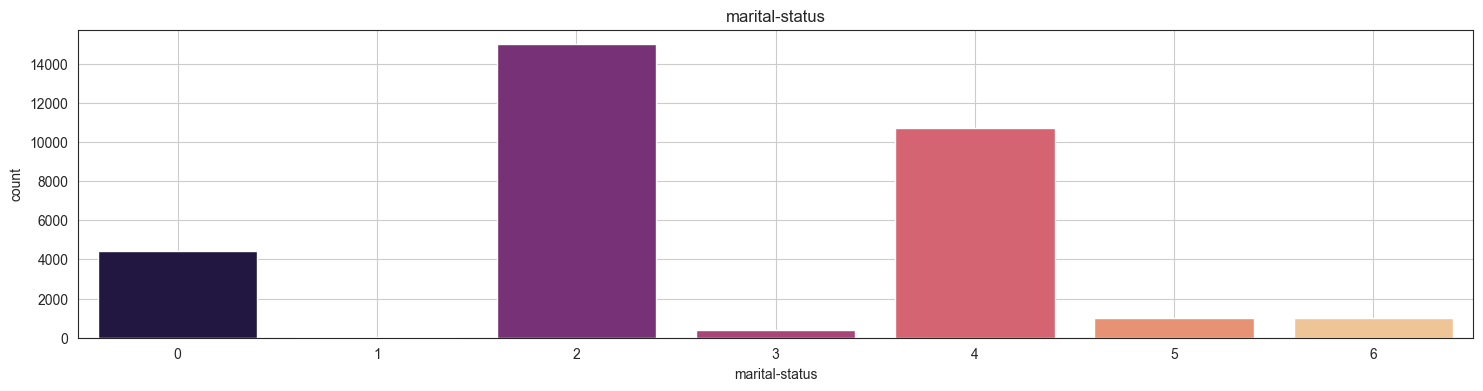

C:\Users\kanis\AppData\Local\Temp\ipykernel_9268\1080157022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[i],data=df,palette='magma')


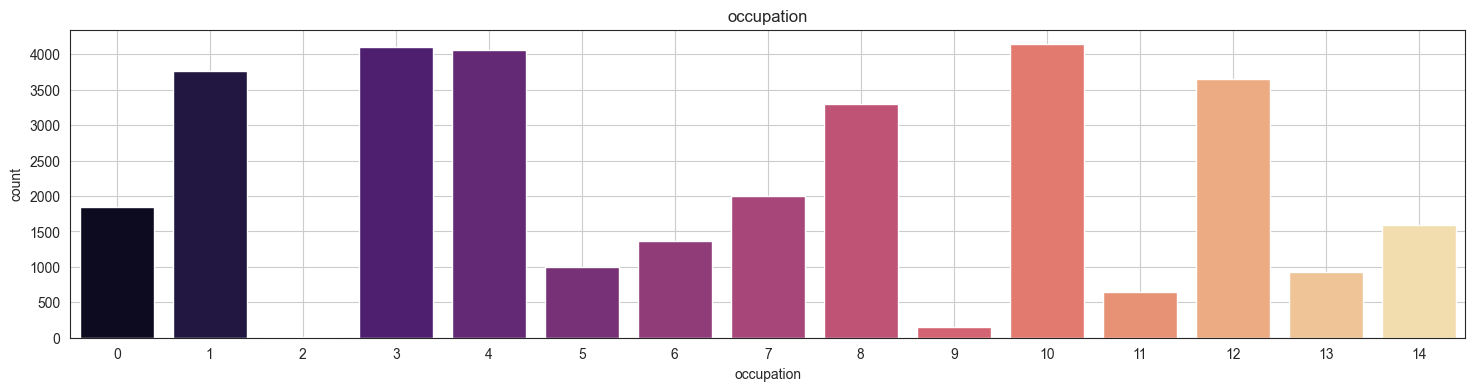

C:\Users\kanis\AppData\Local\Temp\ipykernel_9268\1080157022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[i],data=df,palette='magma')


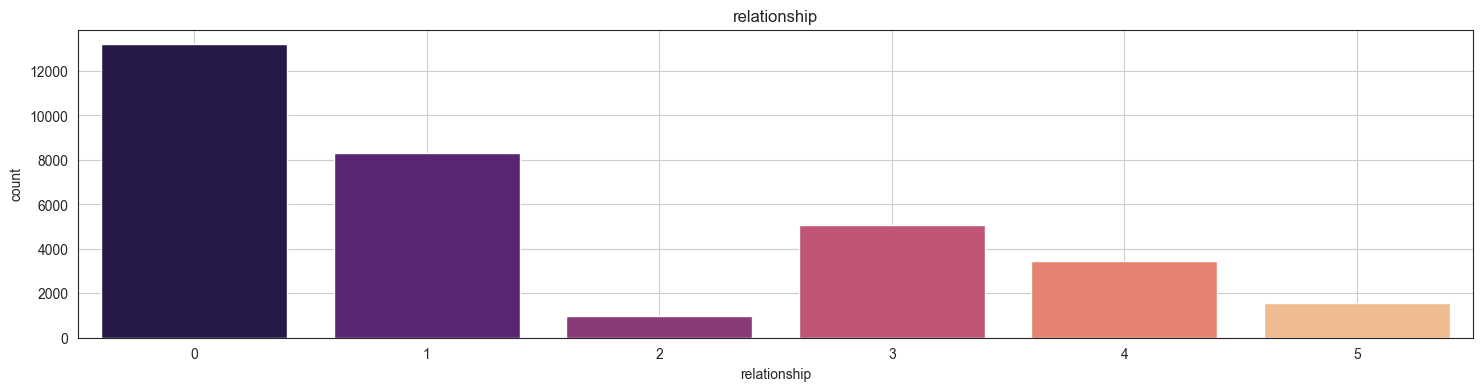

C:\Users\kanis\AppData\Local\Temp\ipykernel_9268\1080157022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[i],data=df,palette='magma')


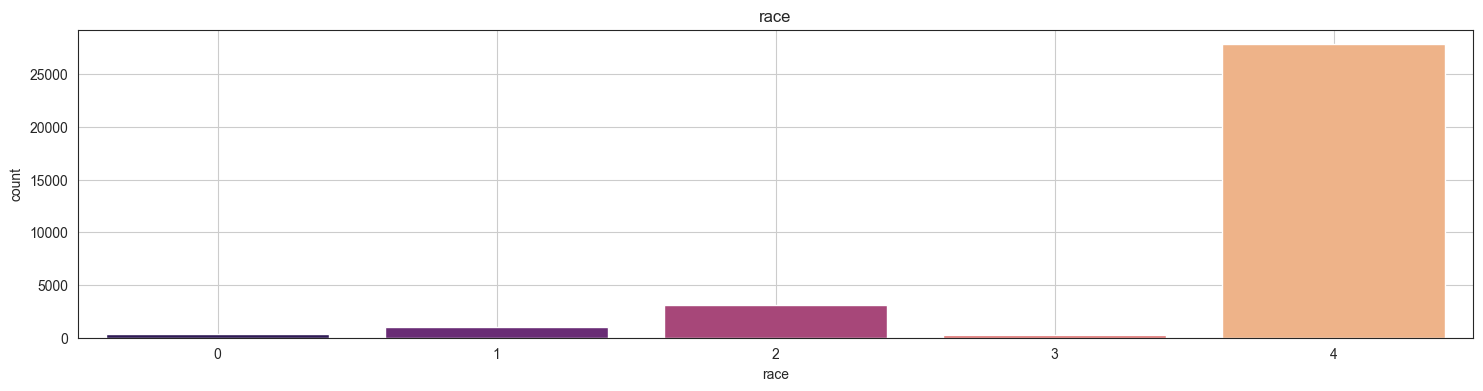

C:\Users\kanis\AppData\Local\Temp\ipykernel_9268\1080157022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[i],data=df,palette='magma')


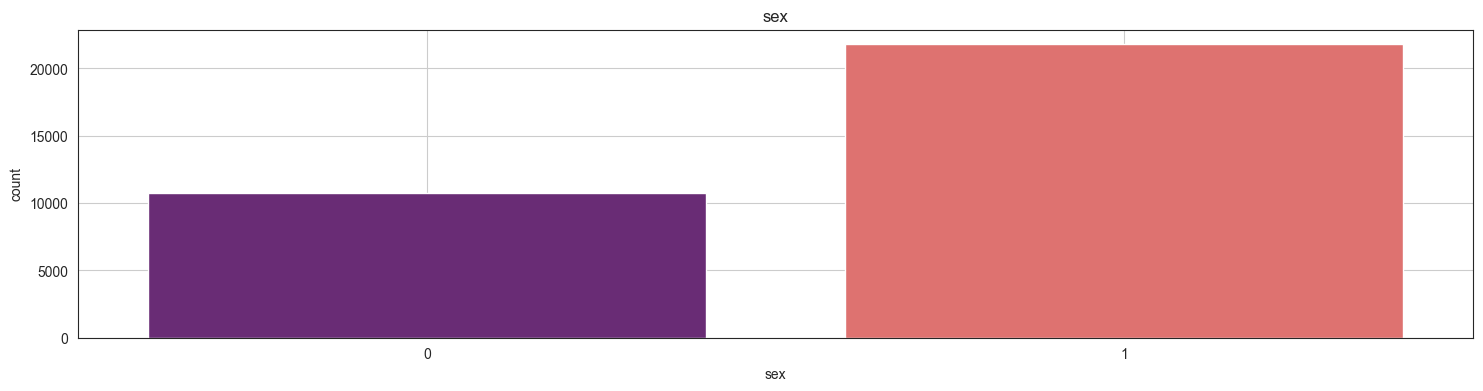

C:\Users\kanis\AppData\Local\Temp\ipykernel_9268\1080157022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[i],data=df,palette='magma')


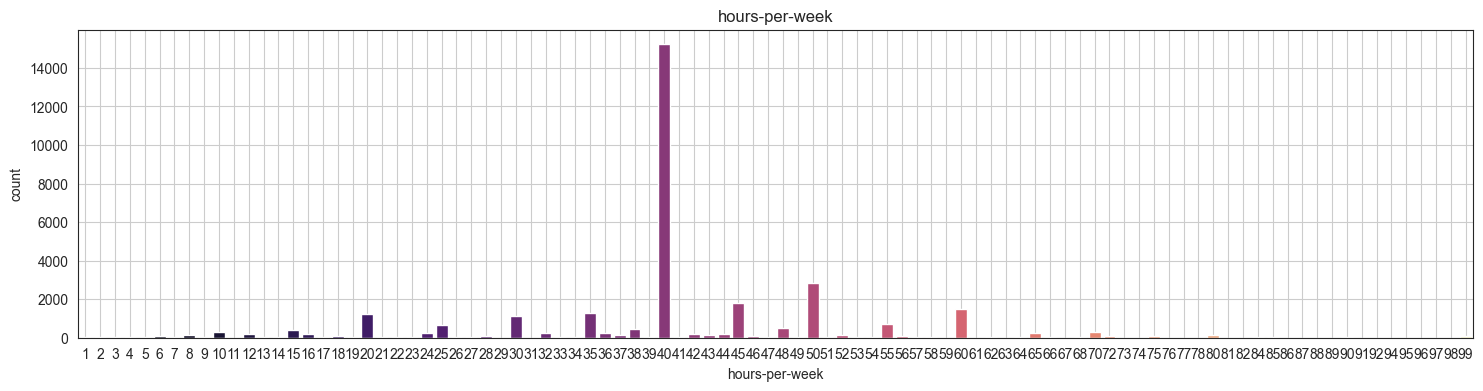

C:\Users\kanis\AppData\Local\Temp\ipykernel_9268\1080157022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[i],data=df,palette='magma')


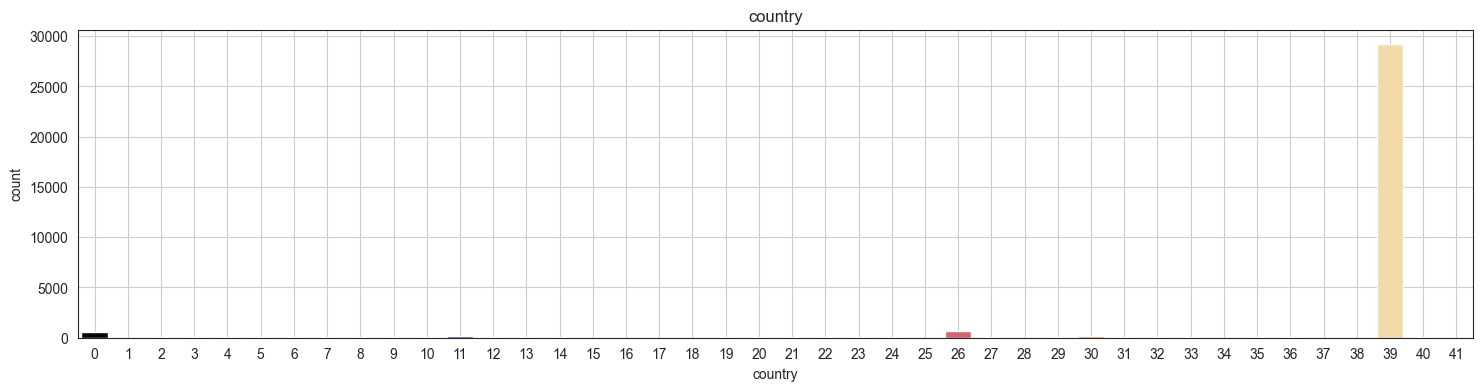

C:\Users\kanis\AppData\Local\Temp\ipykernel_9268\1080157022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[i],data=df,palette='magma')


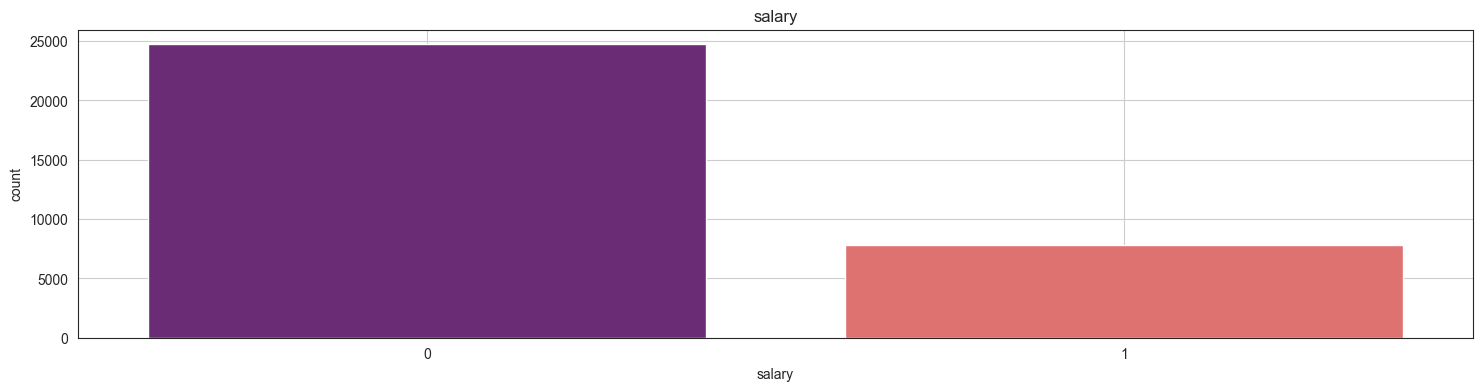

In [5]:
for i in df.drop(['fnlwgt','capital-loss','capital-gain'],axis=1).columns:
    plt.figure(figsize=(18,4))
    sns.countplot(x=df[i],data=df,palette='magma')
    plt.title(i)
    plt.grid()
    plt.show()

## Distribution of Continuous variables

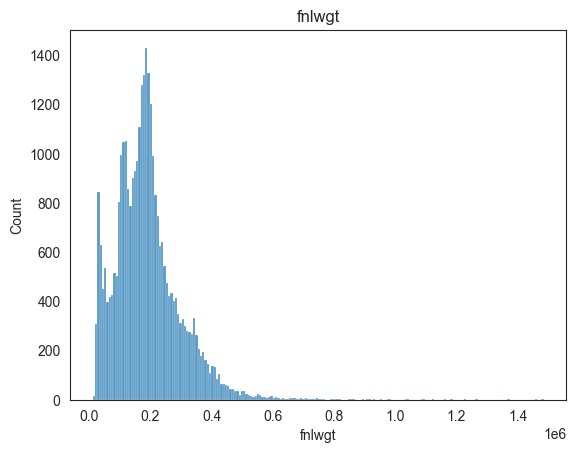

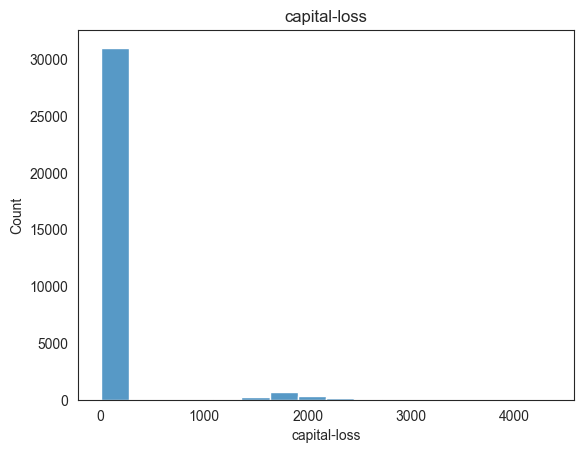

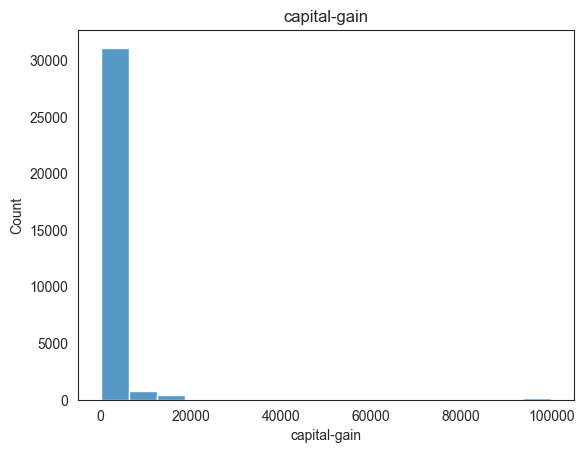

In [6]:
for i in ['fnlwgt','capital-loss','capital-gain']:
    sns.histplot(data=df[i])
    plt.title(i)
    plt.show()

## Checking Outliers

<Axes: >

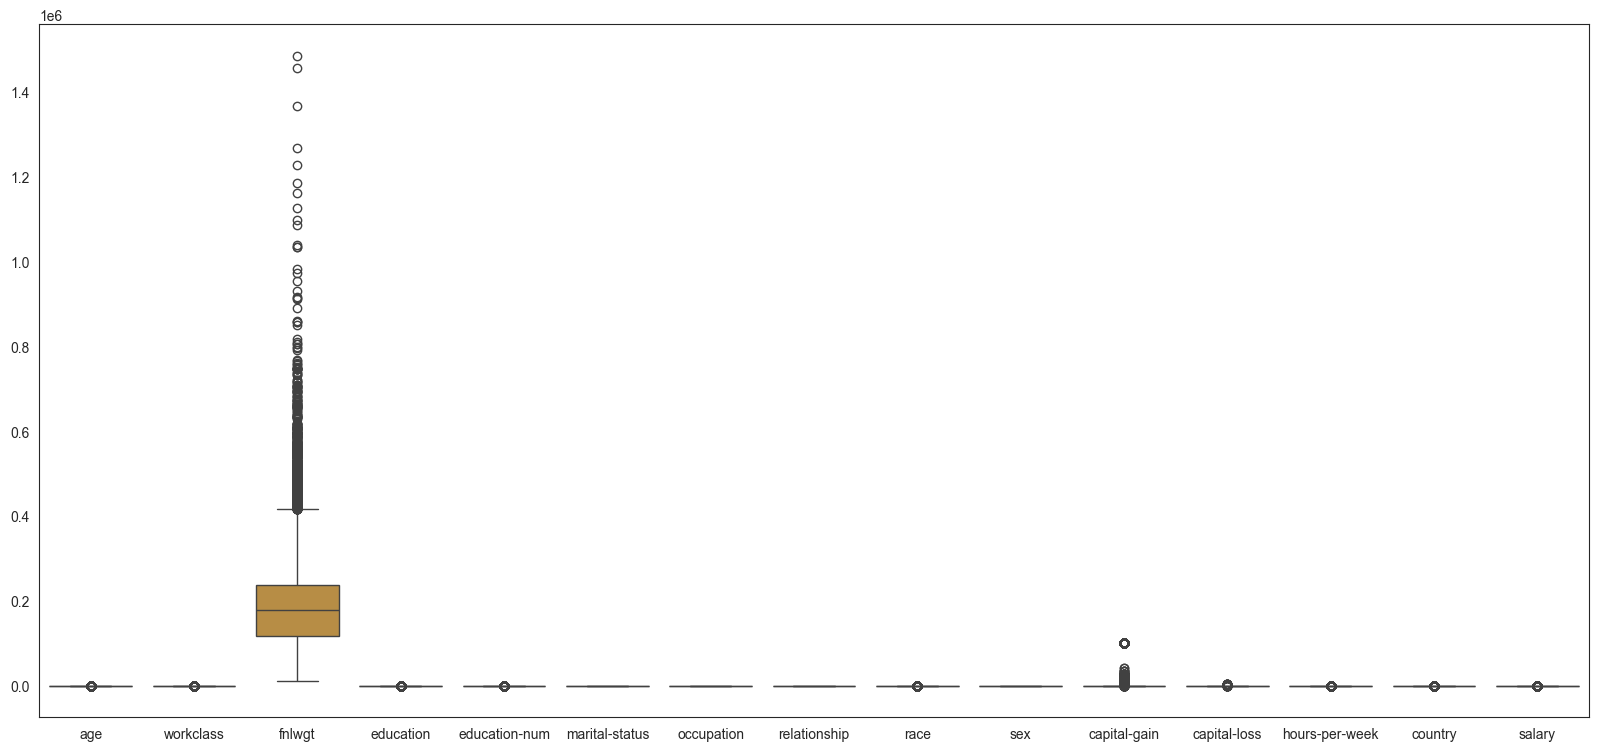

In [7]:
plt.figure(figsize=(20,9))
sns.boxplot(data=df)

## Correlation between Salary and other variables

In [8]:
corr=df.corr().abs().unstack().sort_values(ascending=False).reset_index()
corr[corr['level_0']=='salary']

,level_0,level_1,0
14,salary,salary,1.000000
19,salary,education-num,0.335154
27,salary,relationship,0.250918
32,salary,age,0.234037
34,salary,hours-per-week,0.229689
37,salary,capital-gain,0.223329
39,salary,sex,0.215980
41,salary,marital-status,0.199307
48,salary,capital-loss,0.150526
79,salary,education,0.079317


In [9]:
x=df.drop(['salary'],axis=1)
y=df['salary']

In [10]:
x.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country'],
      dtype='object')

In [11]:
ros=RandomOverSampler()
x,y=ros.fit_resample(x,y)

In [12]:
kf=KFold(shuffle=True,random_state=0)
classifier=RandomForestClassifier()
cross_val_score(estimator=classifier,X=x,y=y,cv=kf,verbose=1,n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   18.2s finished


array([0.93537621, 0.93446602, 0.93173544, 0.93143204, 0.93537621])

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
model=RandomForestClassifier(verbose=1,n_jobs=-1)
rf=model.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.9s


              precision    recall  f1-score   support

           0       0.98      0.89      0.93      5006
           1       0.90      0.98      0.94      4882

    accuracy                           0.94      9888
   macro avg       0.94      0.94      0.94      9888
weighted avg       0.94      0.94      0.94      9888



[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


In [15]:
pickle.dump(rf,open('RandomForestModel.pkl','wb'))

In [16]:
rf_model=pickle.load(open('RandomForestModel.pkl','rb'))

In [17]:
rf_model

RandomForestClassifier(n_jobs=-1, verbose=1)

In [18]:
ar=x_train.iloc[2].values.reshape(1,-1)

In [19]:
rf_model.predict(ar)

c:\Users\kanis\Desktop\Projects\Adult-Census\Adult-Census\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


array([1])

In [20]:
ar

array([[    32,      4, 101352,     15,     10,      2,     13,      5,
             4,      0,      0,      0,     32,     39]], dtype=int64)

In [21]:
x_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country'],
      dtype='object')